In [1]:
import pandas as pd

# Load your dataset (assuming it's in CSV format)
data = pd.read_csv('dataset.csv')


/var/folders/d3/6tf7nvv12t7bs2hz62zg74780000gn/T/ipykernel_72429/3395078829.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = data.drop('Disorder', axis=1).replace({'yes': 1, 'no': 0}).infer_objects()


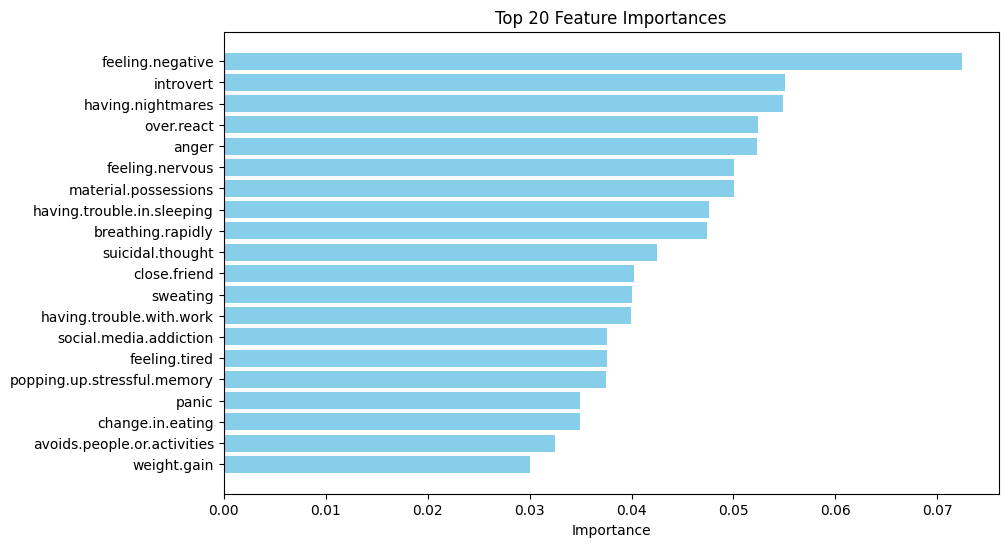

Selected Features (Importance > 0.026):
['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping', 'having.trouble.with.work', 'hopelessness', 'anger', 'over.react', 'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend', 'social.media.addiction', 'weight.gain', 'material.possessions', 'introvert', 'popping.up.stressful.memory', 'having.nightmares', 'avoids.people.or.activities', 'feeling.negative', 'blamming.yourself']

Dropped Features:
['trouble.concentrating']

Training set features after selection and scaling:
Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'material.possessions',
       'introvert', 'popping.up.stressful.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Replace "yes" with 1 and "no" with 0, then explicitly convert to integers
X = data.drop('Disorder', axis=1).replace({'yes': 1, 'no': 0}).infer_objects()
y = data['Disorder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Train RandomForestClassifier on original (unscaled) data to get feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Importance'])

# Step 2: Filter features with importance greater than 0.026
important_features = feature_importances[feature_importances['Importance'] > 0.026].index
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Step 3: Standardize the selected important features
scaler = StandardScaler()
X_train_selected_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), columns=important_features, index=X_train_selected.index)
X_test_selected_scaled = pd.DataFrame(scaler.transform(X_test_selected), columns=important_features, index=X_test_selected.index)

# Step 4: Plot the top 20 most important features
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

# Step 5: Identify dropped features
original_features = X_train.columns
selected_features = important_features
dropped_features = original_features.difference(selected_features)

# Print selected and dropped features
print("Selected Features (Importance > 0.026):")
print(selected_features.tolist())

print("\nDropped Features:")
print(dropped_features.tolist())

# Confirm the columns of the training and test sets after feature selection and scaling
print("\nTraining set features after selection and scaling:")
print(X_train_selected_scaled.columns)

print("\nTest set features after selection and scaling:")
print(X_test_selected_scaled.columns)


(28672, 23)
(12288, 23)
(28672,)
(12288,)


In [101]:
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'SVM': SVC(kernel='linear',shrinking=False),
    'Decision Tree': DecisionTreeClassifier(max_depth=None,criterion='entropy'),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Train models and calculate training time
for name, model in models.items():
    start_time = time.time()  # Start the timer
    model.fit(X_train_selected, y_train)  # Train the model using selected features
    end_time = time.time()  # End the timer
    
    # Calculate training time
    training_time = end_time - start_time
    print(f"{name} model trained in {training_time} seconds.")


SVM model trained in 0.04197120666503906 seconds.
Decision Tree model trained in 0.025953054428100586 seconds.
Logistic Regression model trained in 0.11765217781066895 seconds.
K-Nearest Neighbors model trained in 0.03932905197143555 seconds.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


SVM Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Logistic Regression Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
K-Nearest Neighbors Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [104]:
import time
inference_times = {}

for name, model in models.items():
    start_time = time.time()
    model.predict(X_test_selected_scaled)
    end_time = time.time()
    inference_times[name] = end_time - start_time

best_model_name = min(inference_times, key=inference_times.get)
print(f"Best Model based on Inference Time: {best_model_name}")

best_model = models[best_model_name]
print(inference_times)


Best Model based on Inference Time: Decision Tree
{'SVM': 0.009217023849487305, 'Decision Tree': 0.0016870498657226562, 'Logistic Regression': 0.0019779205322265625, 'K-Nearest Neighbors': 4.378113031387329}


In [13]:
import pandas as pd

# Assume best_model and scaler are already defined
# Define the features used during training (selected features from the model)
selected_features = X_train_selected.columns.tolist()

# Sample input for prediction with some keys missing
new_input = {
    "feeling.nervous": "no",
    "panic": "no",
    "breathing.rapidly": "no",
    "sweating": "yes",
    "trouble.in.concentration": "yes",
    "having.trouble.in.sleeping": "no",
    "having.trouble.with.work": "yes",
    "hopelessness": "yes",
    "anger": "no",
    "over.react": "no",
    "change.in.eating": "no",
    "suicidal.thought": "no",
    "feeling.tired": "yes",
    "close.friend": "yes",
    "social.media.addiction": "yes",
    "material.possessions": "no",
    "introvert": "no",
    "popping.up.stressful.memory": "yes",
    "having.nightmares": "yes",
    "avoids.people.or.activities": "no",
    "feeling.negative": "no",
    "blamming.yourself": "yes"
}

# Create a DataFrame using the selected features
# Initialize with 0, representing 'no' for binary features
input_df = pd.DataFrame([{feature: 1 if new_input.get(feature, 'no') == 'yes' else 0 for feature in selected_features}])
# Standardize the input to match the training data
input_df_scaled = scaler.transform(input_df)

# Predict the disorder using the trained model
prediction = best_model.predict(input_df_scaled)
print("Predicted Disorder:", prediction[0])


Predicted Disorder: Stress


/Users/heman/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [220]:
diagnosis = prediction[0]
print(f"The diagnosis based on symptoms is: {diagnosis}")


The diagnosis based on symptoms is: Normal
